In [1]:
import numpy as np
import matplotlib.pyplot as plt


import Code.utils as utils
import Code.environment.settings as settings
from Code.environment.Environment import Environment
from Code.GreedyLearner import GreedyLearner
from Code.environment.Customer import Customer
from Code.UCBLearner import UCBLearner
from Code.TSLearner import TSLearner
from Code.UCBLearner4 import UCBLearner4
from Code.TSLearner4 import TSLearner4
from Code.UCBLearner5 import UCBLearner5
from Code.TSLearner5 import TSLearner5
from Code.NoisyClairvoyant import NoisyClairvoyant

In [2]:
cust_json = "customer_classes.json"
today_customer = 100
var_cust = 0
p_lambda = 1.0
graph_json = "business_full_graph.json"

arms = settings.prices
environment = Environment(cust_json,today_customer,var_cust,p_lambda, graph_json, arms)
clairvoyant_arms, clairvoyant_reward, exp_c, rew_per_arm= environment.estimate_clairvoyant()
print("\n", clairvoyant_arms, clairvoyant_reward, exp_c, rew_per_arm.values())

loading: [==============================] 99.6%
 [0, 2, 0, 2, 0] 1053.470556 10.534705559999999 dict_values([805.1554590000001, 744.0017541, 714.6353878, 661.0592985, 808.22013075, 747.6714085499999, 718.5939489, 665.57846025, 820.048761, 759.7197324, 730.7453272, 677.9687399999999, 818.1489987500001, 758.1500607500001, 729.3339085, 676.85142125, 779.751425, 719.0021255, 689.829573, 636.6150755000001, 782.5692562500001, 722.40057525, 693.5057714999999, 640.82023275, 793.4755250000001, 733.538012, 704.7525119999999, 652.3018819999999, 791.7186562500001, 732.0911662499999, 703.4543975, 651.27810375, 767.08885, 706.45127435, 677.3282921, 624.2891983499999, 769.6823368749999, 709.608792175, 680.75603305, 628.2230094249999, 779.8772274999999, 720.0442993999999, 691.3059523999999, 639.0052644, 778.207921875, 718.6708088749999, 690.07447325, 638.033720125, 706.9543570000001, 647.8516724, 619.4898440000001, 567.3377376000001, 709.6148035, 651.0470407, 622.941649, 571.2664633, 719.243968, 660.9

In [3]:
n_arms = 4
n_products = 5

feature1 = 0
feature2 = 0

customer = Customer(feature1, feature2)

TIME_HORIZON = 50
NUM_ITERATION = 1


In [4]:
# TODO: we should put the customer argument as optional,since greedy learner has no need of customer(no simulation)
rewards_iterations = []
for i in range(NUM_ITERATION):
    super_arm = clairvoyant_arms
    rewards = []
    for t in range(TIME_HORIZON):
        if t % 10 == 0:
            utils.progress_bar(t, TIME_HORIZON)
        report = environment.round(super_arm)
        prices = [arms[p][a] for p, a in enumerate(super_arm)]
        rewards.append(report.reward(prices))
    rewards_iterations.append(np.array(rewards))
rewards_iterations = np.array(rewards_iterations)
rewards_iterations.shape

loading: [========================      ] 80.0%

(1, 50)

In [5]:
# TODO: we should put the customer argument as optional,since greedy learner has no need of customer(no simulation)
rewards_iterations = []
for i in range(NUM_ITERATION):
    gr_learner = GreedyLearner(n_arms, n_products, customer, graph_json, arms)

    for t in range(TIME_HORIZON):
        if t % 10 == 0:
            utils.progress_bar(t, TIME_HORIZON)
        super_arm = gr_learner.select_superarm()
        report = environment.round(super_arm)
        gr_learner.update(super_arm.copy(), report)
        prices = [arms[p][a] for p, a in enumerate(super_arm)]
    rewards = gr_learner.get_rewards()
    rewards_iterations.append(np.array(rewards))
rewards_iterations = np.array(rewards_iterations)
rewards_iterations.shape

loading: [========================      ] 80.0%

(1, 50)

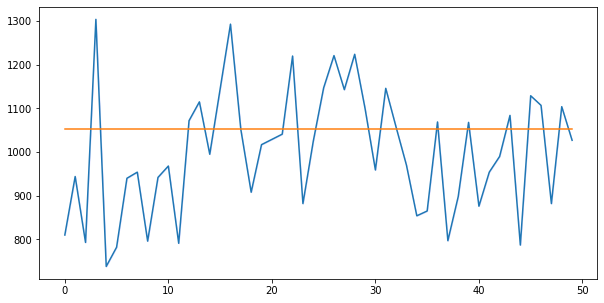

In [6]:
plt.figure(figsize=(10, 5))
mean = np.mean(rewards_iterations, axis=0)
stdev = np.std(rewards_iterations, axis=0)

plt.plot(range(len(mean)), mean)
plt.fill_between(range(len(mean)), (mean-stdev), (mean+stdev), color='b', alpha=.1)
plt.plot(range(len(rewards)), [clairvoyant_reward] * len(rewards))
plt.show()

In [7]:
aggregate_customer = Customer(
    0,
    0,
    environment.get_aggregate_alphas(),
    environment.get_aggregate_num_prods_distribution(),
    environment.get_aggregate_click_graph()
)

In [8]:
rewards_iterations = []
for i in range(NUM_ITERATION):
    ucb1_learner = NoisyClairvoyant(n_arms, n_products, aggregate_customer, graph_json, arms, environment.get_aggregate_click_graph())
    print('Iteration #', i+1)
    for t in range(TIME_HORIZON):
        if t % 10 == 0:
            utils.progress_bar(t, TIME_HORIZON)
        super_arm = ucb1_learner.select_superarm()
        report = environment.round(super_arm)
        ucb1_learner.update(super_arm.copy(), report)
    rewards = ucb1_learner.history_rewards
    rewards_iterations.append(np.array(rewards))
rewards_iterations = np.array(rewards_iterations)
rewards_iterations.shape

Iteration # 1
loading: [========================      ] 80.0%

(1, 50)

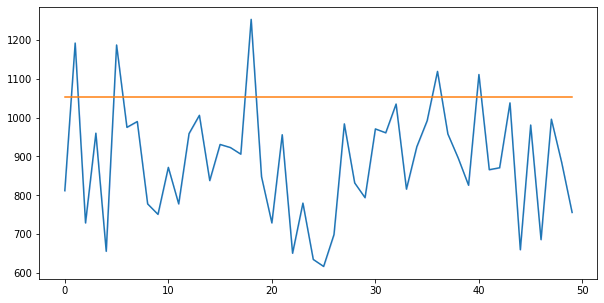

In [9]:
plt.figure(figsize=(10, 5))
mean = np.mean(rewards_iterations, axis=0)
stdev = np.std(rewards_iterations, axis=0)

plt.plot(range(len(mean)), mean)
plt.fill_between(range(len(mean)), (mean-stdev), (mean+stdev), color='b', alpha=.1)

plt.plot([_ for _ in range(len(rewards))], [clairvoyant_reward for _ in range(len(rewards))])
plt.show()

In [10]:
rewards_iterations = []
for i in range(NUM_ITERATION):
    ucb1_learner = UCBLearner(n_arms, n_products, aggregate_customer, graph_json, arms)
    print('Iteration #', i+1)
    for t in range(TIME_HORIZON):
        if t % 10 == 0:
            utils.progress_bar(t, TIME_HORIZON)
        super_arm = ucb1_learner.select_superarm()
        report = environment.round(super_arm)
        ucb1_learner.update(super_arm.copy(), report)
    rewards = ucb1_learner.history_rewards
    rewards_iterations.append(np.array(rewards))
rewards_iterations = np.array(rewards_iterations)
rewards_iterations.shape

Iteration # 1
loading: [========================      ] 80.0%

(1, 50)

In [11]:
ucb1_learner.estimate_conversion_rates()

array([[0.65873736, 0.45307983, 0.27629554, 0.15502564],
       [       inf, 0.86211115, 0.5328    , 0.41460817],
       [0.83825119, 0.716902  , 0.56132668, 0.44499376],
       [       inf, 1.17825089, 0.81538425, 0.69273792],
       [0.66130828, 0.56941773, 0.49778292, 0.45853082]])

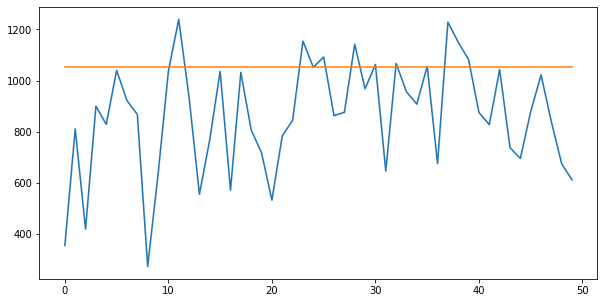

In [12]:
plt.figure(figsize=(10, 5))
mean = np.mean(rewards_iterations, axis=0)
stdev = np.std(rewards_iterations, axis=0)

plt.plot(range(len(mean)), mean)
plt.fill_between(range(len(mean)), (mean-stdev), (mean+stdev), color='b', alpha=.1)

plt.plot([_ for _ in range(len(rewards))], [clairvoyant_reward for _ in range(len(rewards))])
plt.show()

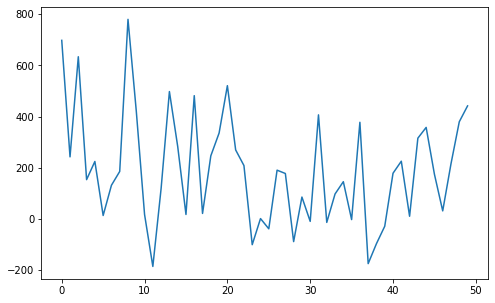

In [13]:
plt.figure(figsize=(8,5))
regret = clairvoyant_reward - rewards_iterations 
mean_regret = np.mean(regret, axis=0)

plt.plot(range(len(mean_regret)), mean_regret)
plt.show()

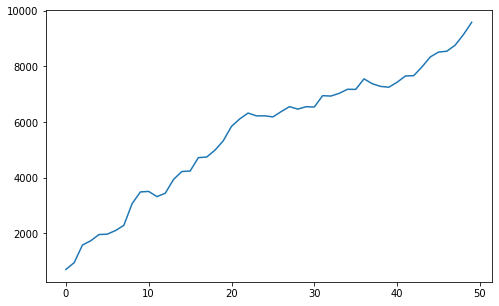

In [14]:
plt.figure(figsize=(8,5))
regret = clairvoyant_reward - rewards_iterations 
cumulative_regret = np.cumsum(regret, axis=1)
cum_reg_mean = np.mean(cumulative_regret, axis=0)

plt.plot(range(len(cum_reg_mean)), cum_reg_mean)
plt.show()

In [15]:
rewards_iterations = []
for i in range(NUM_ITERATION):
    ts_learner = TSLearner(n_arms, n_products, aggregate_customer, graph_json, arms)
    print('\nIteration #', i+1)
    for t in range(TIME_HORIZON):
        if t % 10 == 0:
            utils.progress_bar(t, TIME_HORIZON)
        super_arm = ts_learner.select_superarm()
        report = environment.round(super_arm)
        ts_learner.update(super_arm.copy(), report)
    rewards = ts_learner.history_rewards
    rewards_iterations.append(np.array(rewards))
rewards_iterations = np.array(rewards_iterations)
rewards_iterations.shape


Iteration # 1
loading: [========================      ] 80.0%

(1, 50)

In [16]:
ts_learner.estimate_conversion_rates()

array([[0.49881042, 0.1222704 , 0.05403396, 0.00955509],
       [0.81609076, 0.58893387, 0.3840715 , 0.16284762],
       [0.70991291, 0.46122481, 0.20842987, 0.22244479],
       [0.84728999, 0.70585788, 0.63081316, 0.52450111],
       [0.47058738, 0.2314481 , 0.13543958, 0.14929517]])

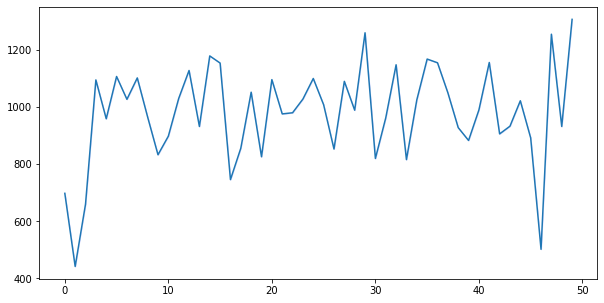

In [17]:
plt.figure(figsize=(10, 5))
mean = np.mean(rewards_iterations, axis=0)
stdev = np.std(rewards_iterations, axis=0)

plt.plot(range(len(mean)), mean)
plt.fill_between(range(len(mean)), (mean-stdev), (mean+stdev), color='b', alpha=.1)

# plt.plot([_ for _ in range(len(rewards))], [clairvoyant_reward for _ in range(len(rewards))])
plt.show()

In [18]:
for t in range(TIME_HORIZON):
    if t % 10 == 0:
        utils.progress_bar(t, TIME_HORIZON)
    super_arm = ts_learner.select_superarm()
    report = environment.round(super_arm)
    ts_learner.update(super_arm.copy(), report)

loading: [========================      ] 80.0%

In [19]:
rewards = ts_learner.history_rewards


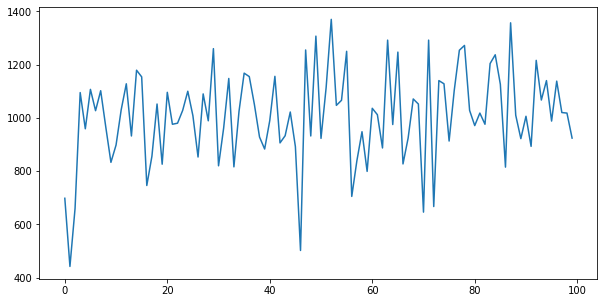

In [20]:
plt.figure(figsize=(10, 5))
plt.plot([_ for _ in range(len(rewards))], rewards)
plt.plot([_ for _ in range(len(rewards))], [clairvoyant_reward for _ in range(len(rewards))])
plt.show()


In [21]:
for t in range(TIME_HORIZON):
    if t % 10 == 0:
        utils.progress_bar(t, TIME_HORIZON)
    super_arm = ts_learner.select_superarm()
    report = environment.round(super_arm)
    ts_learner.update(super_arm.copy(), report)

loading: [========================      ] 80.0%

In [22]:
rewards = ts_learner.history_rewards

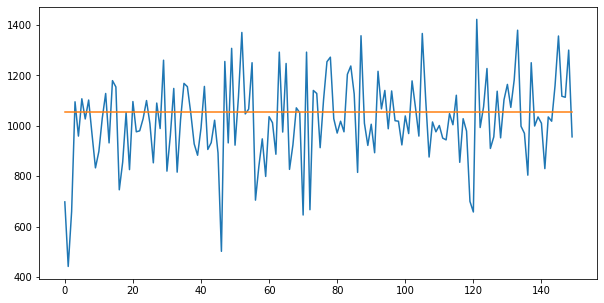

In [23]:
plt.figure(figsize=(10, 5))
plt.plot([_ for _ in range(len(rewards))], rewards)
plt.plot([_ for _ in range(len(rewards))], [clairvoyant_reward for _ in range(len(rewards))])
plt.show()


In [24]:
#unknown parameters
alphas = np.array([0.2, 0.2, 0.2, 0.2, 0.2]) #uniform
prods_dist = np.ones((n_products,n_arms))   #all 1


customer = Customer(0,0, alpha = alphas, num_prods_distribution= prods_dist, click_graph = environment.get_aggregate_click_graph())

In [25]:
rewards_iterations = []
for i in range(NUM_ITERATION):
    ucb4_learner = UCBLearner4(n_arms, n_products, customer, graph_json, arms)
    print('Iteration #', i+1)
    for t in range(TIME_HORIZON):
        if t % 10 == 0:
            utils.progress_bar(t, TIME_HORIZON)
        super_arm = ucb4_learner.select_superarm()
        report = environment.round(super_arm)
        ucb4_learner.update(super_arm.copy(), report)
    rewards = ucb4_learner.history_rewards
    rewards_iterations.append(np.array(rewards))
rewards_iterations = np.array(rewards_iterations)
rewards_iterations.shape

Iteration # 1
loading: [                              ] 0.0%customer alpha: [0.2 0.2 0.2 0.2 0.2]


/home/tpoppo/Documenti/GitHub/OLA_project/Code/MC_simulator.py:42: RuntimeWarning: divide by zero encountered in double_scalars
  ans[primary] = 1 / c.num_prods_distributions[primary][super_arm[primary]]


customer alpha: [0.26 0.22 0.16 0.15 0.21]
customer alpha: [0.3   0.22  0.175 0.135 0.17 ]
customer alpha: [0.29       0.20666667 0.2        0.12666667 0.17666667]
customer alpha: [0.3025 0.1825 0.2    0.12   0.195 ]
customer alpha: [0.298 0.182 0.206 0.11  0.204]
customer alpha: [0.29833333 0.19166667 0.21       0.105      0.195     ]
customer alpha: [0.3        0.19571429 0.20571429 0.10142857 0.19714286]
customer alpha: [0.3075  0.1975  0.20375 0.095   0.19625]
customer alpha: [0.30777778 0.19888889 0.20444444 0.09666667 0.19222222]
loading: [======                        ] 20.0%customer alpha: [0.309 0.2   0.204 0.095 0.192]
customer alpha: [0.30545455 0.20090909 0.20636364 0.10090909 0.18636364]
customer alpha: [0.30583333 0.20166667 0.205      0.105      0.1825    ]
customer alpha: [0.30692308 0.20538462 0.2        0.10615385 0.18153846]
customer alpha: [0.30428571 0.20071429 0.20642857 0.10571429 0.18285714]
customer alpha: [0.306      0.196      0.208      0.10666667 0.18333333

(1, 50)

In [26]:
rewards_iterations = []
for i in range(NUM_ITERATION):
    ts_learner4 = TSLearner4(n_arms, n_products, customer, graph_json, arms)
    print('\nIteration #', i+1)
    for t in range(TIME_HORIZON):
        if t % 10 == 0:
            utils.progress_bar(t, TIME_HORIZON)
        super_arm = ts_learner4.select_superarm()
        report = environment.round(super_arm)
        ts_learner4.update(super_arm.copy(), report)
    rewards = ts_learner4.history_rewards
    rewards_iterations.append(np.array(rewards))
rewards_iterations = np.array(rewards_iterations)
rewards_iterations.shape


Iteration # 1
loading: [                              ] 0.0%

/home/tpoppo/Documenti/GitHub/OLA_project/Code/MC_simulator.py:42: RuntimeWarning: divide by zero encountered in double_scalars
  ans[primary] = 1 / c.num_prods_distributions[primary][super_arm[primary]]


loading: [========================      ] 80.0%

(1, 50)

In [27]:
#unknown param
c_graph = np.zeros((n_products,n_products))

customer2 = Customer(0,0, environment.get_aggregate_alphas(), environment.get_aggregate_num_prods_distribution(), click_graph=c_graph)

In [28]:
rewards_iterations = []
for i in range(NUM_ITERATION):
    ucb5_learner = UCBLearner5(n_arms, n_products, customer2, graph_json, arms)
    print('Iteration #', i+1)
    for t in range(TIME_HORIZON):
        if t % 10 == 0:
            utils.progress_bar(t, TIME_HORIZON)
        super_arm = ucb5_learner.select_superarm()
        report = environment.round(super_arm)
        ucb5_learner.update(super_arm.copy(), report)
    rewards = ucb5_learner.history_rewards
    rewards_iterations.append(np.array(rewards))
rewards_iterations = np.array(rewards_iterations)
rewards_iterations.shape

Iteration # 1
loading: [                              ] 0.0%[[0.         0.         0.         0.         0.        ]
 [0.5        0.         0.5        0.         0.        ]
 [0.         0.66666667 0.         0.16666667 0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]]
[[0.         0.5        0.         0.         0.        ]
 [0.5625     0.         0.625      0.         0.        ]
 [0.         0.72222222 0.         0.11111111 0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.8        0.2        0.         0.         0.        ]]
[[0.         0.36363636 0.         0.         0.09090909]
 [0.52380952 0.         0.71428571 0.         0.        ]
 [0.         0.64285714 0.         0.10714286 0.        ]
 [0.         0.         0.06666667 0.         0.13333333]
 [0.58333333 0.25       0.         0.         0.        ]]
[[0.         0.36363636 0.         0.         0.09090909]
 [0.52173

(1, 50)